In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
TRAIN_PATH='../input/train.csv'
TEST_PATH='../input/test.csv'
SAMPLE_PATH='../input/sample_submission.csv'

In [29]:
train=pd.read_csv(TRAIN_PATH)
test=pd.read_csv(TEST_PATH)
sample=pd.read_csv(SAMPLE_PATH)

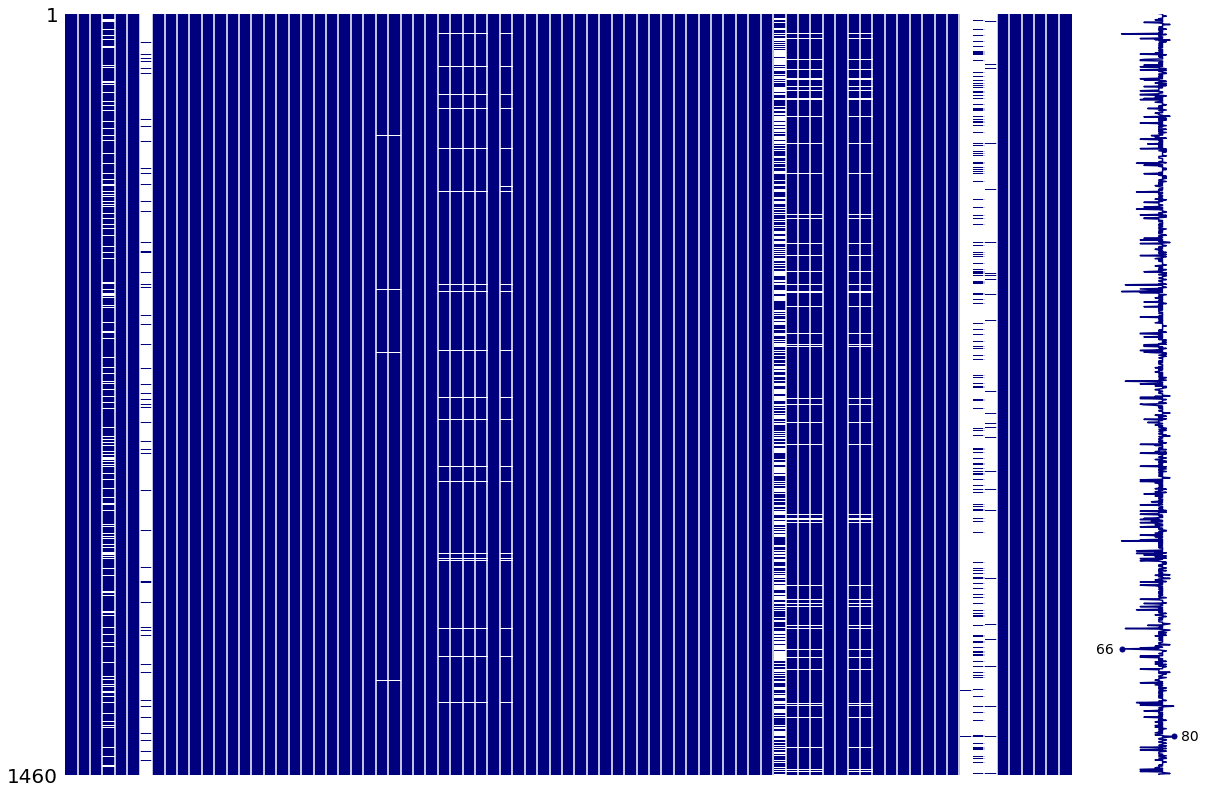

In [30]:
import missingno as msno
msno.matrix(df=train,figsize=(20,14),color=(0,0,0.5))

In [15]:
dtyes_df=train.dtypes.reset_index()
dtyes_df.columns=['count','columns type']
dtyes_df.groupby('columns type').aggregate('count').reset_index()

,columns type,count
0,int64,35
1,float64,3
2,object,43


In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


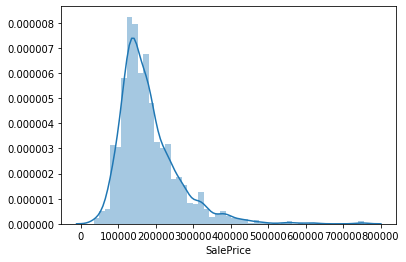

In [17]:
sns.distplot(train['SalePrice'])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


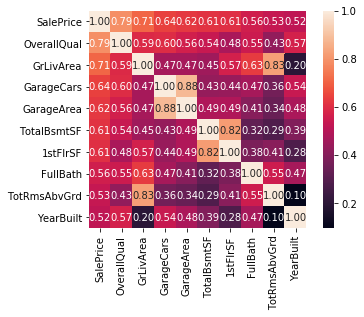

In [19]:
corrmat=train.corr()
print(corrmat.nlargest(10,'SalePrice')['SalePrice'])
cols=corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

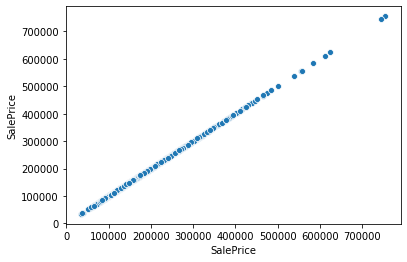

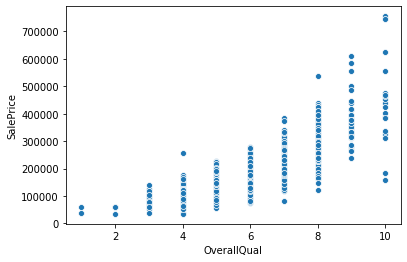

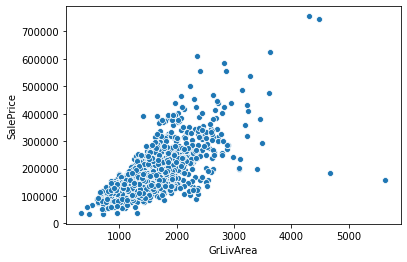

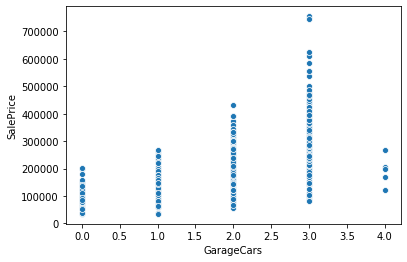

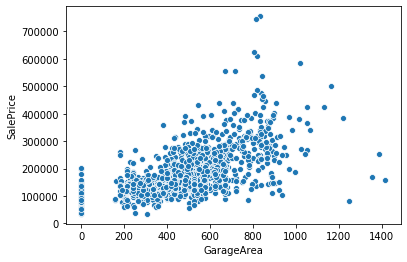

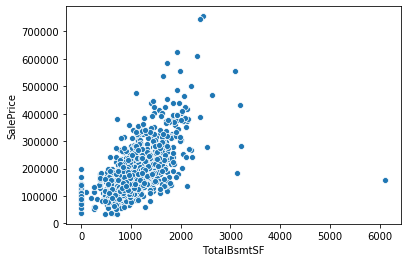

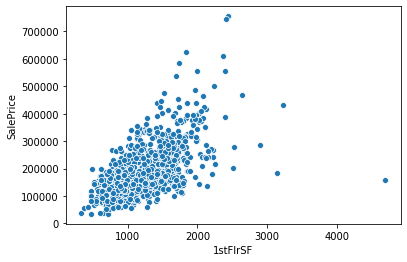

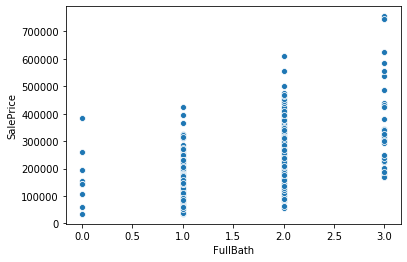

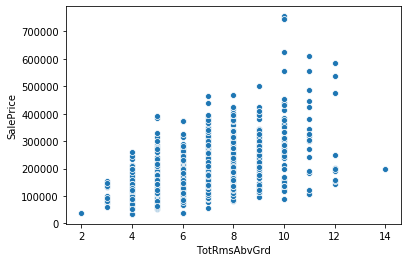

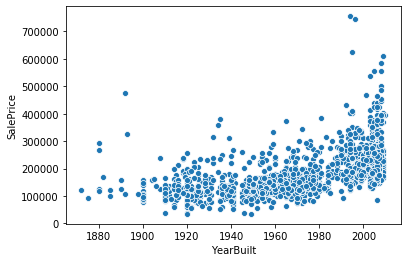

In [22]:
for c in cols:
    sns.scatterplot(x=c,y='SalePrice',data=train)
    plt.show()

In [31]:
train=train.drop(train[train['SalePrice']>700000].index)

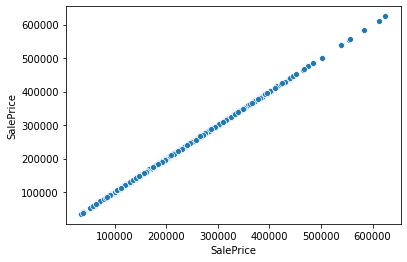

In [32]:
 sns.scatterplot(x='SalePrice',y='SalePrice',data=train)

In [33]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

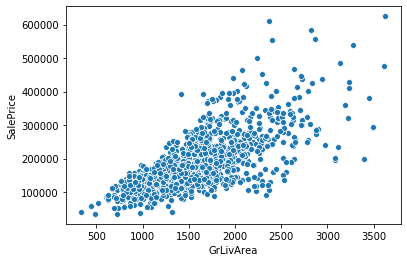

In [34]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [37]:
train=train.drop(train[train['TotalBsmtSF']>4000].index)

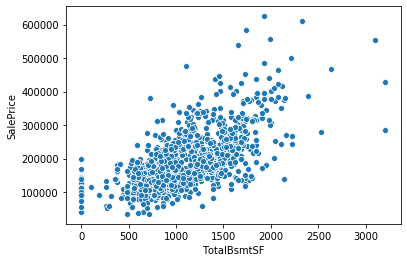

In [38]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train)

In [40]:
train=train.drop(train[train['1stFlrSF']>4000].index)


 mu = 180151.23 and sigma = 76670.25



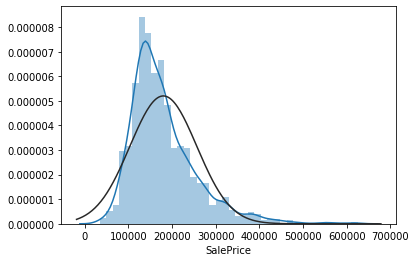

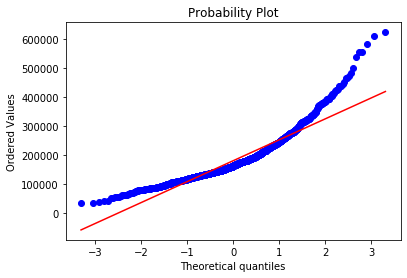

In [42]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train['SalePrice'],fit=norm)
mu,sigma=norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)


 mu = 12.02 and sigma = 0.40



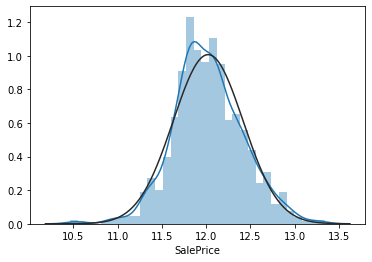

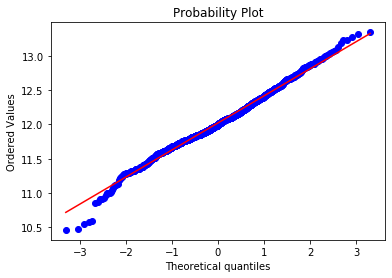

In [45]:
sns.distplot(np.log1p(train['SalePrice']),fit=norm)
mu,sigma=norm.fit(np.log1p(train['SalePrice']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig=plt.figure()
res=stats.probplot(np.log1p(train['SalePrice']),plot=plt)

## 訓練データで、外れ値、重要な特徴量を分析した後に、訓練データとテストデータをまとめる

In [46]:
ntrain=train.shape[0]
ntest=test.shape[0]
# 正解ラベルを取得、データを取得するにはvaluesを使う
y_train=train.SalePrice.values
#train['SalePrice'].values

all_data=pd.concat([train,test]).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [57]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na

PoolQC          99.725557
MiscFeature     96.397942
Alley           93.207547
Fence           80.445969
FireplaceQu     48.713551
LotFrontage     16.672384
GarageQual       5.454545
GarageCond       5.454545
GarageFinish     5.454545
GarageYrBlt      5.454545
GarageType       5.385935
BsmtExposure     2.813036
BsmtCond         2.813036
BsmtQual         2.778731
BsmtFinType2     2.744425
BsmtFinType1     2.710120
MasVnrType       0.823328
MasVnrArea       0.789022
MSZoning         0.137221
BsmtFullBath     0.068611
BsmtHalfBath     0.068611
Utilities        0.068611
Functional       0.068611
Electrical       0.034305
BsmtUnfSF        0.034305
Exterior1st      0.034305
Exterior2nd      0.034305
TotalBsmtSF      0.034305
GarageArea       0.034305
GarageCars       0.034305
BsmtFinSF2       0.034305
BsmtFinSF1       0.034305
KitchenQual      0.034305
SaleType         0.034305
dtype: float64

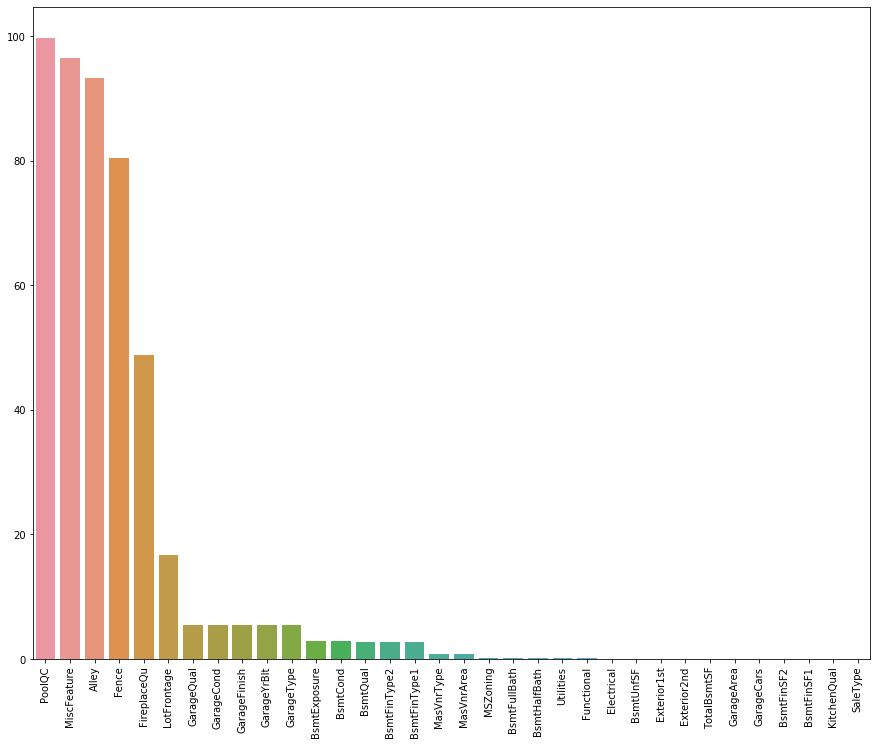

In [51]:
# seaborn　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)

In [67]:
all_data=all_data.drop(all_data_na.loc[all_data_na>10].index,axis=1)

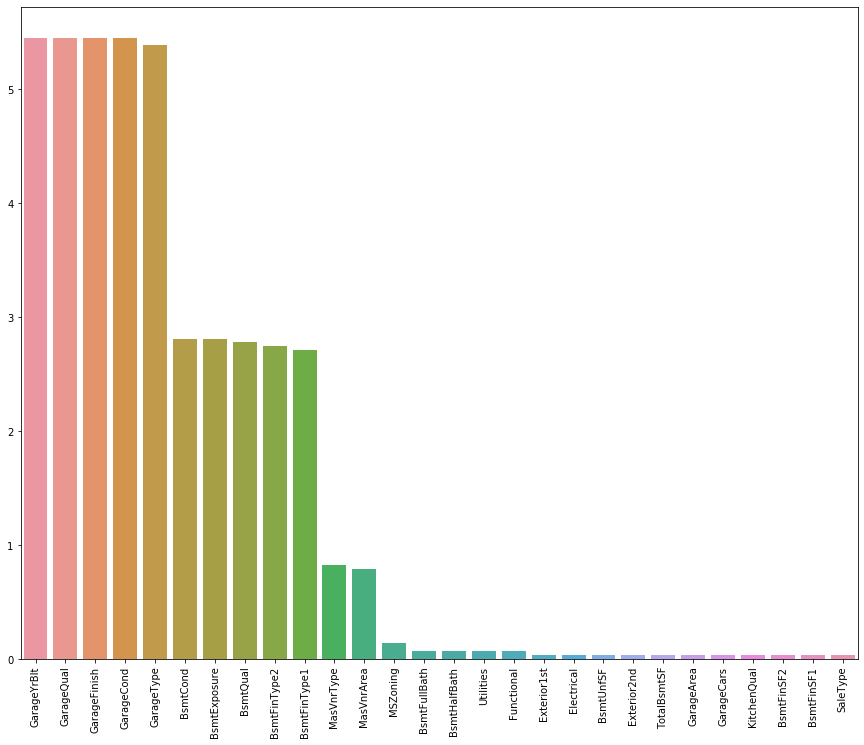

In [68]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)

In [69]:
all_data[all_data_na.index].head()

,GarageYrBlt,GarageQual,GarageFinish,GarageCond,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,...,Electrical,BsmtUnfSF,Exterior2nd,TotalBsmtSF,GarageArea,GarageCars,KitchenQual,BsmtFinSF2,BsmtFinSF1,SaleType
0,2003.0,TA,RFn,TA,Attchd,TA,No,Gd,Unf,GLQ,...,SBrkr,150.0,VinylSd,856.0,548.0,2.0,Gd,0.0,706.0,WD
1,1976.0,TA,RFn,TA,Attchd,TA,Gd,Gd,Unf,ALQ,...,SBrkr,284.0,MetalSd,1262.0,460.0,2.0,TA,0.0,978.0,WD
2,2001.0,TA,RFn,TA,Attchd,TA,Mn,Gd,Unf,GLQ,...,SBrkr,434.0,VinylSd,920.0,608.0,2.0,Gd,0.0,486.0,WD
3,1998.0,TA,Unf,TA,Detchd,Gd,No,TA,Unf,ALQ,...,SBrkr,540.0,Wd Shng,756.0,642.0,3.0,Gd,0.0,216.0,WD
4,2000.0,TA,RFn,TA,Attchd,TA,Av,Gd,Unf,GLQ,...,SBrkr,490.0,VinylSd,1145.0,836.0,3.0,Gd,0.0,655.0,WD


In [115]:
for c in all_data_na.index:
    all_data[c]=all_data[c].fillna(all_data[c].mode()[0])

In [116]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na.shape

(0,)

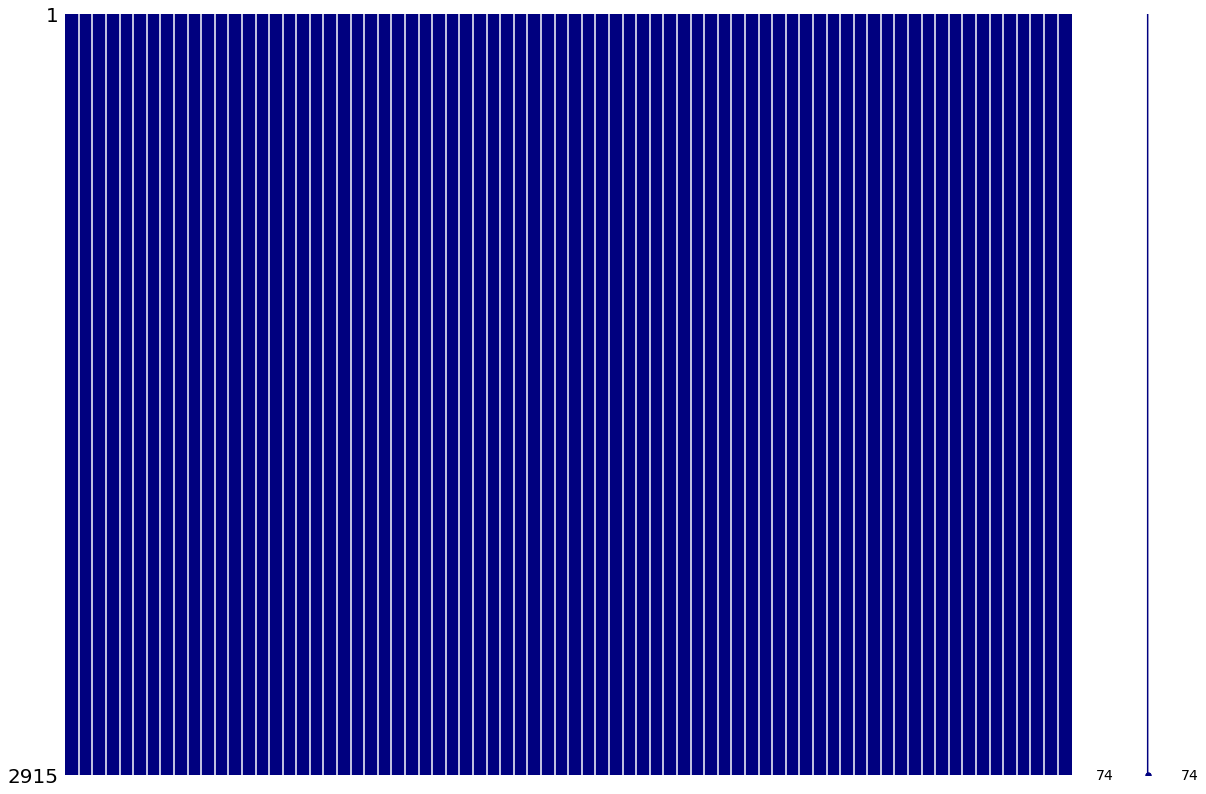

In [117]:
import missingno as msno
msno.matrix(df=all_data,figsize=(20,14),color=(0,0,0.5))

In [120]:
object_cols=all_data.select_dtypes(include=object).columns
from sklearn.preprocessing import LabelEncoder
for c in object_cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 74)


In [121]:
dtyes_df=all_data.dtypes.reset_index()
dtyes_df.columns=['count','columns type']
dtyes_df.groupby('columns type').aggregate('count').reset_index()

,columns type,count
0,int64,64
1,float64,10


In [123]:
X_train=all_data[:ntrain]
X_test=all_data[ntrain:]

In [127]:
y_train=train['SalePrice']
y_train_log=np.log(y_train)

In [130]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [156]:
n_folds=3

# デフォルトの交差検証cross_val_scoreではデータのシャッフルが行われないので、シャッフルした訓練データと検証データを用いるようにする
def rmse_cv(model):
    # K分割交差検証のイテレータを作成、get_n_splits(train.values)で分割して生成されるイテレーション数を取得する,kfはただのint型
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    
    #cross_val_score の返り値が指定した性能指標Mean squared error regression lossを返す
    rmse=np.sqrt(-cross_val_score(model,X_train.values,y_train_log,scoring="neg_mean_squared_error",cv=kf))
    return(rmse)

In [157]:
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1187 (0.0078)



In [150]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [159]:
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train_log)
xgb_train_pred=model_xgb.predict(X_train)
xgb_pred=np.exp(model_xgb.predict(X_test))
print(rmse(y_train_log,xgb_train_pred))

0.07935978453986116
